Regression for Exponential Growth - Applied to the Corona Virus


In [2]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('full_data_2.csv', sep = ';')
data.head(10)

,Time,Infections
0,23/01/2020,1
1,24/01/2020,1
2,25/01/2020,2
3,26/01/2020,2
4,27/01/2020,5
5,28/01/2020,5
6,29/01/2020,5
7,30/01/2020,5
8,31/01/2020,6
9,01/02/2020,7


In [18]:
data['logInfections'] = np.log(data.Infections)
data.head(10)

,Time,Infections,logInfections
0,23/01/2020,1,0.000000
1,24/01/2020,1,0.000000
2,25/01/2020,2,0.693147
3,26/01/2020,2,0.693147
4,27/01/2020,5,1.609438
5,28/01/2020,5,1.609438
6,29/01/2020,5,1.609438
7,30/01/2020,5,1.609438
8,31/01/2020,6,1.791759
9,01/02/2020,7,1.945910


In [6]:
X = data.Time
X = sm.add_constant(X)

In [7]:
y = data.logInfections

In [8]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [9]:
# log initial = 0.4480
# initial = 
np.exp(0.4480)

1.5651786956535216

In [10]:
# log 1 + r = 0.1128
# real 1 + r = 
np.exp(0.1128)

1.119408028953142

In [11]:
# actual function = 
#y = np.exp(0.4480) * np.exp(0.1128) ** t

In [12]:
def linear_predictions(t):
    return np.exp(0.4480) * np.exp(0.1128) ** t

In [13]:
data['Predictions'] = data.Time.apply(linear_predictions)
data.head(10)

TypeError: ufunc 'power' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

AttributeError: 'DataFrame' object has no attribute 'Predictions'

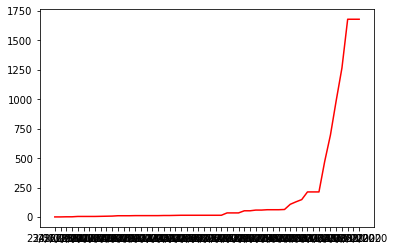

In [14]:
plt.plot(data.Time, data.Infections, 'red')
plt.plot(data.Time, data.Predictions, 'blue')
plt.title('Predicted number of cases vs real number of cases')
plt.xlabel('Time')
plt.ylabel('Infections')
plt.legend()